In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df1 = pd.read_csv('df_merged.csv')
df1

,month,CO2ppm,Temp,Humid,VPD,Chl_a,Chl_b,TChl,Car,Chl_a_b,...,DF_abs,SFI_abs,Fv-Fm,Leaf_ExtractionYield,Root_ExtractionYield,Leaf_TPC,Root_TPC,Leaf_TFC,Root_TFC,scenario
0,5,381.681033,16.918639,83.130786,1.532512,8.79,2.22,11.00,2.97,3.97,...,0.328,0.215,0.830,19.00,18.90,7.476,6.270,5.217,0.861,SSP1
1,5,374.463441,16.922124,83.096722,1.532868,8.99,2.56,11.55,3.09,3.52,...,0.287,0.199,0.826,20.10,19.60,7.369,6.396,5.257,0.836,SSP1
2,5,371.850683,16.930256,82.488003,1.534584,9.66,2.44,12.10,3.11,3.96,...,0.384,0.229,0.828,20.70,20.40,7.369,6.396,5.242,0.841,SSP1
3,5,400.475202,16.921511,82.081632,1.534512,9.33,2.45,11.79,3.13,3.80,...,0.503,0.282,0.839,19.00,18.90,7.476,6.270,5.217,0.861,SSP1
4,5,381.360788,16.921323,83.888666,1.531475,10.53,2.58,13.11,3.37,4.08,...,0.304,0.203,0.832,20.10,19.60,7.369,6.396,5.257,0.836,SSP1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,9,1208.463000,25.901000,60.192000,2.560000,2.64,0.52,3.15,1.07,5.09,...,-0.626,0.051,0.722,7.10,14.60,7.743,5.277,1.455,0.513,SSP5
401,9,1211.911000,25.896000,60.254000,2.559000,4.74,1.12,5.86,1.53,4.22,...,-0.829,0.046,0.588,7.05,14.55,7.760,5.245,1.450,0.507,SSP5
402,9,1206.015000,25.923000,59.125000,2.565000,2.52,0.08,2.60,1.38,31.49,...,-0.879,0.037,0.643,7.00,14.50,7.814,5.324,1.460,0.518,SSP5
403,9,1225.166000,25.890000,55.446000,2.571000,2.63,0.39,3.02,1.17,6.73,...,-0.478,0.067,0.727,7.10,14.60,7.743,5.277,1.455,0.513,SSP5


In [3]:
# 데이터 기본 정보 확인
print("="*60)
print("데이터 기본 정보")
print("="*60)
print(f"데이터 크기: {df1.shape}")
print(f"변수 개수: {df1.shape[1]}")
print(f"데이터 개수: {df1.shape[0]}")
print("\n변수 목록:")
print(df1.columns.tolist())
print("\n데이터 타입:")
print(df1.dtypes)
print("\n결측치 확인:")
print(df1.isnull().sum())


데이터 기본 정보
데이터 크기: (405, 26)
변수 개수: 26
데이터 개수: 405

변수 목록:
['month', 'CO2ppm', 'Temp', 'Humid', 'VPD', 'Chl_a', 'Chl_b', 'TChl', 'Car', 'Chl_a_b', 'TCh-Car', 'ABS-RC', 'Dio-RC', 'Tro-RC', 'Eto-RC', 'PI_abs', 'DF_abs', 'SFI_abs', 'Fv-Fm', 'Leaf_ExtractionYield', 'Root_ExtractionYield', 'Leaf_TPC', 'Root_TPC', 'Leaf_TFC', 'Root_TFC', 'scenario']

데이터 타입:
month                     int64
CO2ppm                  float64
Temp                    float64
Humid                   float64
VPD                     float64
Chl_a                   float64
Chl_b                   float64
TChl                    float64
Car                     float64
Chl_a_b                 float64
TCh-Car                 float64
ABS-RC                  float64
Dio-RC                  float64
Tro-RC                  float64
Eto-RC                  float64
PI_abs                  float64
DF_abs                  float64
SFI_abs                 float64
Fv-Fm                   float64
Leaf_ExtractionYield    float64
Root_E

In [4]:
# 상관관계 분석
numeric_df = df1.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()

# 높은 상관관계를 가진 변수 쌍 찾기
print("="*60)
print("높은 상관관계를 가진 변수 쌍 (|r| > 0.8)")
print("="*60)

high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((
                corr_matrix.columns[i], 
                corr_matrix.columns[j], 
                corr_matrix.iloc[i, j]
            ))

# 상관계수 크기 순으로 정렬
high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

for var1, var2, corr in high_corr_pairs:
    print(f"{var1:20} <-> {var2:20} : {corr:6.3f}")

print(f"\n총 {len(high_corr_pairs)}개의 높은 상관관계 쌍 발견")


높은 상관관계를 가진 변수 쌍 (|r| > 0.8)
Temp                 <-> VPD                  :  0.997
PI_abs               <-> SFI_abs              :  0.989
Chl_a                <-> TChl                 :  0.987
ABS-RC               <-> Tro-RC               :  0.966
Dio-RC               <-> DF_abs               : -0.965
Dio-RC               <-> Fv-Fm                : -0.962
DF_abs               <-> Fv-Fm                :  0.931
DF_abs               <-> SFI_abs              :  0.925
ABS-RC               <-> SFI_abs              : -0.925
ABS-RC               <-> Dio-RC               :  0.914
month                <-> Leaf_ExtractionYield : -0.912
TChl                 <-> Car                  :  0.908
ABS-RC               <-> DF_abs               : -0.898
Chl_a                <-> Car                  :  0.895
PI_abs               <-> DF_abs               :  0.890
Tro-RC               <-> SFI_abs              : -0.882
ABS-RC               <-> PI_abs               : -0.874
Dio-RC               <-> SFI_abs    

In [5]:
# VIF (Variance Inflation Factor) 분석
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 숫자형 데이터만 선택 (month 제외)
vif_data = numeric_df.drop(['month'], axis=1, errors='ignore')

# VIF 계산
print("="*60)
print("VIF (Variance Inflation Factor) 분석")
print("="*60)
print("VIF > 10: 심각한 다중공산성")
print("VIF > 5: 다중공산성 의심")
print("-"*60)

vif_results = []
for i in range(len(vif_data.columns)):
    vif = variance_inflation_factor(vif_data.values, i)
    vif_results.append({
        'Variable': vif_data.columns[i],
        'VIF': vif
    })

vif_df = pd.DataFrame(vif_results)
vif_df = vif_df.sort_values('VIF', ascending=False)

# VIF 값 출력
for _, row in vif_df.iterrows():
    status = ""
    if row['VIF'] > 10:
        status = " ⚠️ 심각한 다중공산성"
    elif row['VIF'] > 5:
        status = " ⚠️ 다중공산성 의심"
    print(f"{row['Variable']:25} : VIF = {row['VIF']:10.2f}{status}")

print("\n" + "="*60)
print(f"VIF > 10인 변수: {len(vif_df[vif_df['VIF'] > 10])}개")
print(f"VIF > 5인 변수: {len(vif_df[vif_df['VIF'] > 5])}개")


VIF (Variance Inflation Factor) 분석
VIF > 10: 심각한 다중공산성
VIF > 5: 다중공산성 의심
------------------------------------------------------------
ABS-RC                    : VIF = 32235291.21 ⚠️ 심각한 다중공산성
Tro-RC                    : VIF = 19394305.14 ⚠️ 심각한 다중공산성
TChl                      : VIF = 3282460.19 ⚠️ 심각한 다중공산성
Chl_a                     : VIF = 2015120.26 ⚠️ 심각한 다중공산성
Dio-RC                    : VIF = 1769634.82 ⚠️ 심각한 다중공산성
Chl_b                     : VIF =  154745.56 ⚠️ 심각한 다중공산성
Temp                      : VIF =   51334.16 ⚠️ 심각한 다중공산성
VPD                       : VIF =   29948.12 ⚠️ 심각한 다중공산성
Fv-Fm                     : VIF =    9568.42 ⚠️ 심각한 다중공산성
SFI_abs                   : VIF =    2201.79 ⚠️ 심각한 다중공산성
Eto-RC                    : VIF =    1826.02 ⚠️ 심각한 다중공산성
Root_TPC                  : VIF =    1727.92 ⚠️ 심각한 다중공산성
Car                       : VIF =    1433.67 ⚠️ 심각한 다중공산성
TCh-Car                   : VIF =    1426.98 ⚠️ 심각한 다중공산성
DF_abs                    : VIF =     963.10 ⚠️ 심각한 

In [6]:
# 이상치 탐지 (IQR 방법)
def detect_outliers_iqr(df, column):
    """IQR 방법으로 이상치 탐지"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("="*60)
print("이상치 탐지 결과 (IQR 방법)")
print("="*60)

outlier_summary = []
for col in numeric_df.columns:
    if col == 'month':
        continue
    
    outliers, lower, upper = detect_outliers_iqr(numeric_df, col)
    outlier_count = len(outliers)
    
    if outlier_count > 0:
        outlier_percentage = (outlier_count / len(numeric_df)) * 100
        outlier_summary.append({
            'Variable': col,
            'Outlier_Count': outlier_count,
            'Percentage': outlier_percentage,
            'Lower_Bound': lower,
            'Upper_Bound': upper
        })
        print(f"{col:25} : {outlier_count:4}개 ({outlier_percentage:5.1f}%) | 정상범위: [{lower:8.2f}, {upper:8.2f}]")

print(f"\n이상치가 있는 변수: {len(outlier_summary)}개")


이상치 탐지 결과 (IQR 방법)
Temp                      :   15개 (  3.7%) | 정상범위: [   18.70,    31.04]
Humid                     :   45개 ( 11.1%) | 정상범위: [   55.59,    73.72]
VPD                       :   14개 (  3.5%) | 정상범위: [    1.62,     3.22]
Chl_a                     :    6개 (  1.5%) | 정상범위: [    0.93,     9.93]
Chl_b                     :   24개 (  5.9%) | 정상범위: [    0.40,     2.64]
TChl                      :    9개 (  2.2%) | 정상범위: [    1.33,    12.57]
Car                       :    3개 (  0.7%) | 정상범위: [    0.44,     3.56]
Chl_a_b                   :   18개 (  4.4%) | 정상범위: [    2.05,     5.52]
TCh-Car                   :   12개 (  3.0%) | 정상범위: [    2.12,     4.84]
Dio-RC                    :   38개 (  9.4%) | 정상범위: [   -0.01,     0.84]
Tro-RC                    :   13개 (  3.2%) | 정상범위: [    0.68,     2.66]
Eto-RC                    :   12개 (  3.0%) | 정상범위: [    0.25,     1.00]
PI_abs                    :   30개 (  7.4%) | 정상범위: [   -0.50,     3.38]
DF_abs                    :   56개 ( 13.8%) | 

## 📊 다중공산성 처리 방안

### 1. 다중공산성 문제 분석
- **VIF > 10**: 심각한 다중공산성 - 반드시 처리 필요
- **VIF > 5**: 다중공산성 의심 - 상황에 따라 처리 고려
- 높은 상관관계(|r| > 0.8)를 가진 변수 쌍 확인

### 2. 처리 방법 (우선순위 순)

#### 방법 1: 변수 선택 (Variable Selection)
- 상관관계가 높은 변수 중 하나를 제거
- 도메인 지식을 활용하여 더 중요한 변수를 선택
- 예: TChl(총엽록소)과 Chl_a, Chl_b가 높은 상관관계 → TChl만 사용

#### 방법 2: 주성분 분석 (PCA)
- 상관관계가 높은 변수들을 주성분으로 변환
- 정보 손실을 최소화하면서 차원 축소
- 해석이 어려워질 수 있음

#### 방법 3: 능선 회귀 (Ridge Regression)
- 다중공산성이 있어도 안정적인 추정 가능
- 회귀 계수에 패널티 부여

#### 방법 4: 변수 변환
- 비율 변수 생성 (예: Chl_a/Chl_b 비율)
- 차이 변수 생성 (예: TChl - Car)


## 🔍 이상치 처리 방안

### 1. 이상치 처리 여부 결정 기준

#### ✅ 이상치를 **제거하지 않는** 경우 (권장)
1. **천궁 재배 데이터의 특성상 극한 기후 조건이 중요**
   - 극한 온도, 습도 조건에서의 생육 반응이 연구 목적일 수 있음
   - 기후변화 시나리오 예측에는 극값이 중요한 정보

2. **이상치 비율이 낮은 경우 (< 5%)**
   - 대부분 변수의 이상치 비율이 5% 미만
   - 모델의 강건성(robustness)을 해치지 않음

3. **시계열 데이터의 특성**
   - 계절적 변동으로 인한 자연스러운 극값일 가능성
   - 여름/겨울철 극한 기온은 정상적인 현상

#### ⚠️ 이상치를 **처리해야 하는** 경우
1. **명백한 측정 오류**
   - 물리적으로 불가능한 값 (예: 습도 > 100%)
   - 음수여야 할 값이 양수인 경우

2. **이상치 비율이 매우 높은 경우 (> 15%)**
   - Fv-Fm (16.5%), DF_abs (13.8%) 등
   - 모델 학습에 부정적 영향 가능

### 2. 이상치 처리 방법

#### 방법 1: Winsorization (권장)
- 극단값을 특정 백분위수로 대체
- 정보 손실 최소화
```python
# 95% 백분위수로 캡핑
df[col] = df[col].clip(lower=df[col].quantile(0.025), 
                       upper=df[col].quantile(0.975))
```

#### 방법 2: 로그 변환
- 오른쪽 꼬리가 긴 분포에 효과적
- 이상치의 영향력 감소
```python
df[col + '_log'] = np.log1p(df[col])
```

#### 방법 3: Robust Scaling
- 중앙값과 IQR 사용
- 이상치에 덜 민감
```python
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df[col + '_scaled'] = scaler.fit_transform(df[[col]])
```

#### 방법 4: 이상치 플래깅
- 이상치를 제거하지 않고 플래그 변수 생성
- 모델이 이상치 정보를 활용할 수 있음
```python
df[col + '_outlier'] = ((df[col] < lower) | (df[col] > upper)).astype(int)
```


In [7]:
# 다중공산성 처리 예시 코드

print("="*60)
print("🔧 다중공산성 처리 예시")
print("="*60)

# 1. 높은 상관관계를 가진 변수 중 하나 제거
# 예: TChl과 Chl_a, Chl_b가 높은 상관관계를 가지는 경우
columns_to_drop = []

# TChl이 Chl_a + Chl_b의 합이므로, 개별 성분 대신 총합 사용
if 'TChl' in df1.columns and 'Chl_a' in df1.columns and 'Chl_b' in df1.columns:
    # TChl과 Chl_a, Chl_b의 상관관계 확인
    corr_tchl_a = df1[['TChl', 'Chl_a']].corr().iloc[0, 1]
    corr_tchl_b = df1[['TChl', 'Chl_b']].corr().iloc[0, 1]
    
    print(f"TChl vs Chl_a 상관계수: {corr_tchl_a:.3f}")
    print(f"TChl vs Chl_b 상관계수: {corr_tchl_b:.3f}")
    
    if abs(corr_tchl_a) > 0.8 or abs(corr_tchl_b) > 0.8:
        print("→ TChl과 개별 엽록소 성분의 상관관계가 높음")
        print("→ 권장: TChl만 사용하고 Chl_a, Chl_b 제거")
        columns_to_drop.extend(['Chl_a', 'Chl_b'])

# 2. 비율 변수 생성
print("\n비율 변수 생성 예시:")
if 'Chl_a' in df1.columns and 'Chl_b' in df1.columns:
    # Chl_a/Chl_b 비율은 이미 존재 (Chl_a_b)
    if 'Chl_a_b' in df1.columns:
        print("✓ Chl_a/Chl_b 비율 변수 이미 존재 (Chl_a_b)")

# 3. PCA 적용 예시
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 엽록소 관련 변수들에 PCA 적용
chlorophyll_vars = ['Chl_a', 'Chl_b', 'TChl', 'Car']
chlorophyll_vars = [col for col in chlorophyll_vars if col in df1.columns]

if len(chlorophyll_vars) > 2:
    print(f"\nPCA 적용 (엽록소 관련 {len(chlorophyll_vars)}개 변수):")
    
    # 표준화
    scaler = StandardScaler()
    chlorophyll_scaled = scaler.fit_transform(df1[chlorophyll_vars].dropna())
    
    # PCA 적용
    pca = PCA(n_components=2)
    chlorophyll_pca = pca.fit_transform(chlorophyll_scaled)
    
    print(f"설명된 분산 비율: {pca.explained_variance_ratio_}")
    print(f"누적 설명 분산: {pca.explained_variance_ratio_.sum():.3f}")
    
    # 주성분을 데이터프레임에 추가 (예시)
    # df1['Chlorophyll_PC1'] = chlorophyll_pca[:, 0]
    # df1['Chlorophyll_PC2'] = chlorophyll_pca[:, 1]

print("\n" + "="*60)


🔧 다중공산성 처리 예시
TChl vs Chl_a 상관계수: 0.987
TChl vs Chl_b 상관계수: 0.845
→ TChl과 개별 엽록소 성분의 상관관계가 높음
→ 권장: TChl만 사용하고 Chl_a, Chl_b 제거

비율 변수 생성 예시:
✓ Chl_a/Chl_b 비율 변수 이미 존재 (Chl_a_b)

PCA 적용 (엽록소 관련 4개 변수):
설명된 분산 비율: [0.89563999 0.07257116]
누적 설명 분산: 0.968



In [8]:
# 이상치 처리 예시 코드

print("="*60)
print("🔧 이상치 처리 예시")
print("="*60)

# 이상치 비율이 높은 변수들 선별
high_outlier_vars = ['Fv-Fm', 'DF_abs', 'Humid', 'Root_ExtractionYield', 'Root_TPC']
high_outlier_vars = [col for col in high_outlier_vars if col in df1.columns]

# 1. Winsorization 예시
print("1. Winsorization (95% 백분위수 캡핑)")
df1_winsorized = df1.copy()

for col in high_outlier_vars[:2]:  # 예시로 2개만
    if col in df1_winsorized.columns:
        lower = df1_winsorized[col].quantile(0.025)
        upper = df1_winsorized[col].quantile(0.975)
        
        before_outliers = ((df1_winsorized[col] < lower) | (df1_winsorized[col] > upper)).sum()
        
        df1_winsorized[col] = df1_winsorized[col].clip(lower=lower, upper=upper)
        
        print(f"  {col}: {before_outliers}개 이상치 → 캡핑 적용")
        print(f"    범위: [{lower:.3f}, {upper:.3f}]")

# 2. 로그 변환 예시
print("\n2. 로그 변환 (오른쪽 꼬리 분포)")
df1_log = df1.copy()

# 양수 값만 가지는 변수에 로그 변환 적용
positive_vars = ['Root_ExtractionYield', 'Leaf_TPC', 'Root_TPC']
for col in positive_vars:
    if col in df1_log.columns and (df1_log[col] > 0).all():
        df1_log[col + '_log'] = np.log1p(df1_log[col])
        print(f"  {col} → {col}_log 변환 완료")

# 3. Robust Scaling 예시
print("\n3. Robust Scaling")
from sklearn.preprocessing import RobustScaler

df1_robust = df1.copy()
scaler = RobustScaler()

for col in high_outlier_vars[:2]:  # 예시로 2개만
    if col in df1_robust.columns:
        df1_robust[col + '_scaled'] = scaler.fit_transform(df1_robust[[col]])
        print(f"  {col} → {col}_scaled 생성")

# 4. 이상치 플래깅 예시
print("\n4. 이상치 플래깅 (이상치 지시 변수)")
df1_flagged = df1.copy()

for col in high_outlier_vars[:3]:  # 예시로 3개만
    if col in df1_flagged.columns:
        Q1 = df1_flagged[col].quantile(0.25)
        Q3 = df1_flagged[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        df1_flagged[col + '_outlier'] = ((df1_flagged[col] < lower) | 
                                         (df1_flagged[col] > upper)).astype(int)
        
        outlier_count = df1_flagged[col + '_outlier'].sum()
        print(f"  {col}_outlier: {outlier_count}개 이상치 플래그")

print("\n" + "="*60)


🔧 이상치 처리 예시
1. Winsorization (95% 백분위수 캡핑)
  Fv-Fm: 20개 이상치 → 캡핑 적용
    범위: [0.645, 0.840]
  DF_abs: 15개 이상치 → 캡핑 적용
    범위: [-0.849, 0.588]

2. 로그 변환 (오른쪽 꼬리 분포)
  Root_ExtractionYield → Root_ExtractionYield_log 변환 완료
  Leaf_TPC → Leaf_TPC_log 변환 완료
  Root_TPC → Root_TPC_log 변환 완료

3. Robust Scaling
  Fv-Fm → Fv-Fm_scaled 생성
  DF_abs → DF_abs_scaled 생성

4. 이상치 플래깅 (이상치 지시 변수)
  Fv-Fm_outlier: 67개 이상치 플래그
  DF_abs_outlier: 56개 이상치 플래그
  Humid_outlier: 45개 이상치 플래그



## 📌 최종 권장사항

### 🎯 천궁 예측 모델을 위한 데이터 전처리 전략

#### 1. **다중공산성 처리 (우선순위: 높음)**
- **즉시 처리 필요:**
  - TChl, Chl_a, Chl_b 중 TChl만 사용 (개별 성분 제거)
  - 이미 비율 변수(Chl_a_b, TCh-Car)가 있으므로 활용
  
- **모델에 따른 선택:**
  - 선형 모델 (회귀분석): 다중공산성 처리 필수
  - 트리 기반 모델 (Random Forest, XGBoost): 다중공산성에 강건하므로 그대로 사용 가능

#### 2. **이상치 처리 (우선순위: 중간)**
- **처리 권장 변수:**
  - Fv-Fm (16.5% 이상치): Winsorization 적용
  - DF_abs (13.8% 이상치): Winsorization 적용
  - Humid (11.1% 이상치): 100% 초과 값만 100으로 캡핑
  
- **처리하지 않아도 되는 이유:**
  - 기후변화 시나리오 데이터의 특성상 극값이 중요한 정보
  - 천궁 재배의 한계 조건 파악에 필요
  - 대부분 변수의 이상치 비율이 5% 미만

#### 3. **추천 전처리 파이프라인**

```python
# Step 1: 다중공산성 처리
df_processed = df1.drop(['Chl_a', 'Chl_b'], axis=1)  # TChl만 사용

# Step 2: 이상치 처리 (선택적)
high_outlier_cols = ['Fv-Fm', 'DF_abs']
for col in high_outlier_cols:
    if col in df_processed.columns:
        lower = df_processed[col].quantile(0.025)
        upper = df_processed[col].quantile(0.975)
        df_processed[col] = df_processed[col].clip(lower=lower, upper=upper)

# Step 3: 스케일링 (모델에 따라 선택)
# - 선형 모델: StandardScaler 또는 RobustScaler
# - 트리 모델: 스케일링 불필요

# Step 4: 범주형 변수 인코딩
# scenario 변수를 원-핫 인코딩 또는 레이블 인코딩
```

#### 4. **모델 선택 가이드**
- **Random Forest / XGBoost 추천**
  - 다중공산성에 강건
  - 이상치에 상대적으로 둔감
  - 비선형 관계 포착 가능
  
- **선형 회귀 사용 시**
  - 다중공산성 처리 필수
  - Ridge/Lasso 정규화 적용
  - 이상치 처리 권장

#### 5. **검증 전략**
- 시계열 특성 고려: 시간 순서대로 Train/Test 분할
- 교차 검증: TimeSeriesSplit 사용
- 평가 지표: RMSE, MAE, R² 사용


In [9]:
# TChl만 사용하고 Chl_a, Chl_b 제거
df_processed = df1.drop(['Chl_a', 'Chl_b'], axis=1)

In [12]:
# Winsorization 적용
df_processed['Fv-Fm'] = df_processed['Fv-Fm'].clip(
     lower=df_processed['Fv-Fm'].quantile(0.025),
     upper=df_processed['Fv-Fm'].quantile(0.975)
)
df_processed['DF_abs'] = df_processed['DF_abs'].clip(
    lower=df_processed['DF_abs'].quantile(0.025),
    upper=df_processed['DF_abs'].quantile(0.975)
)

# Humid 변수 100 초과 값을 100으로 캡핑
df_processed['Humid'] = df_processed['Humid'].clip(upper=100)

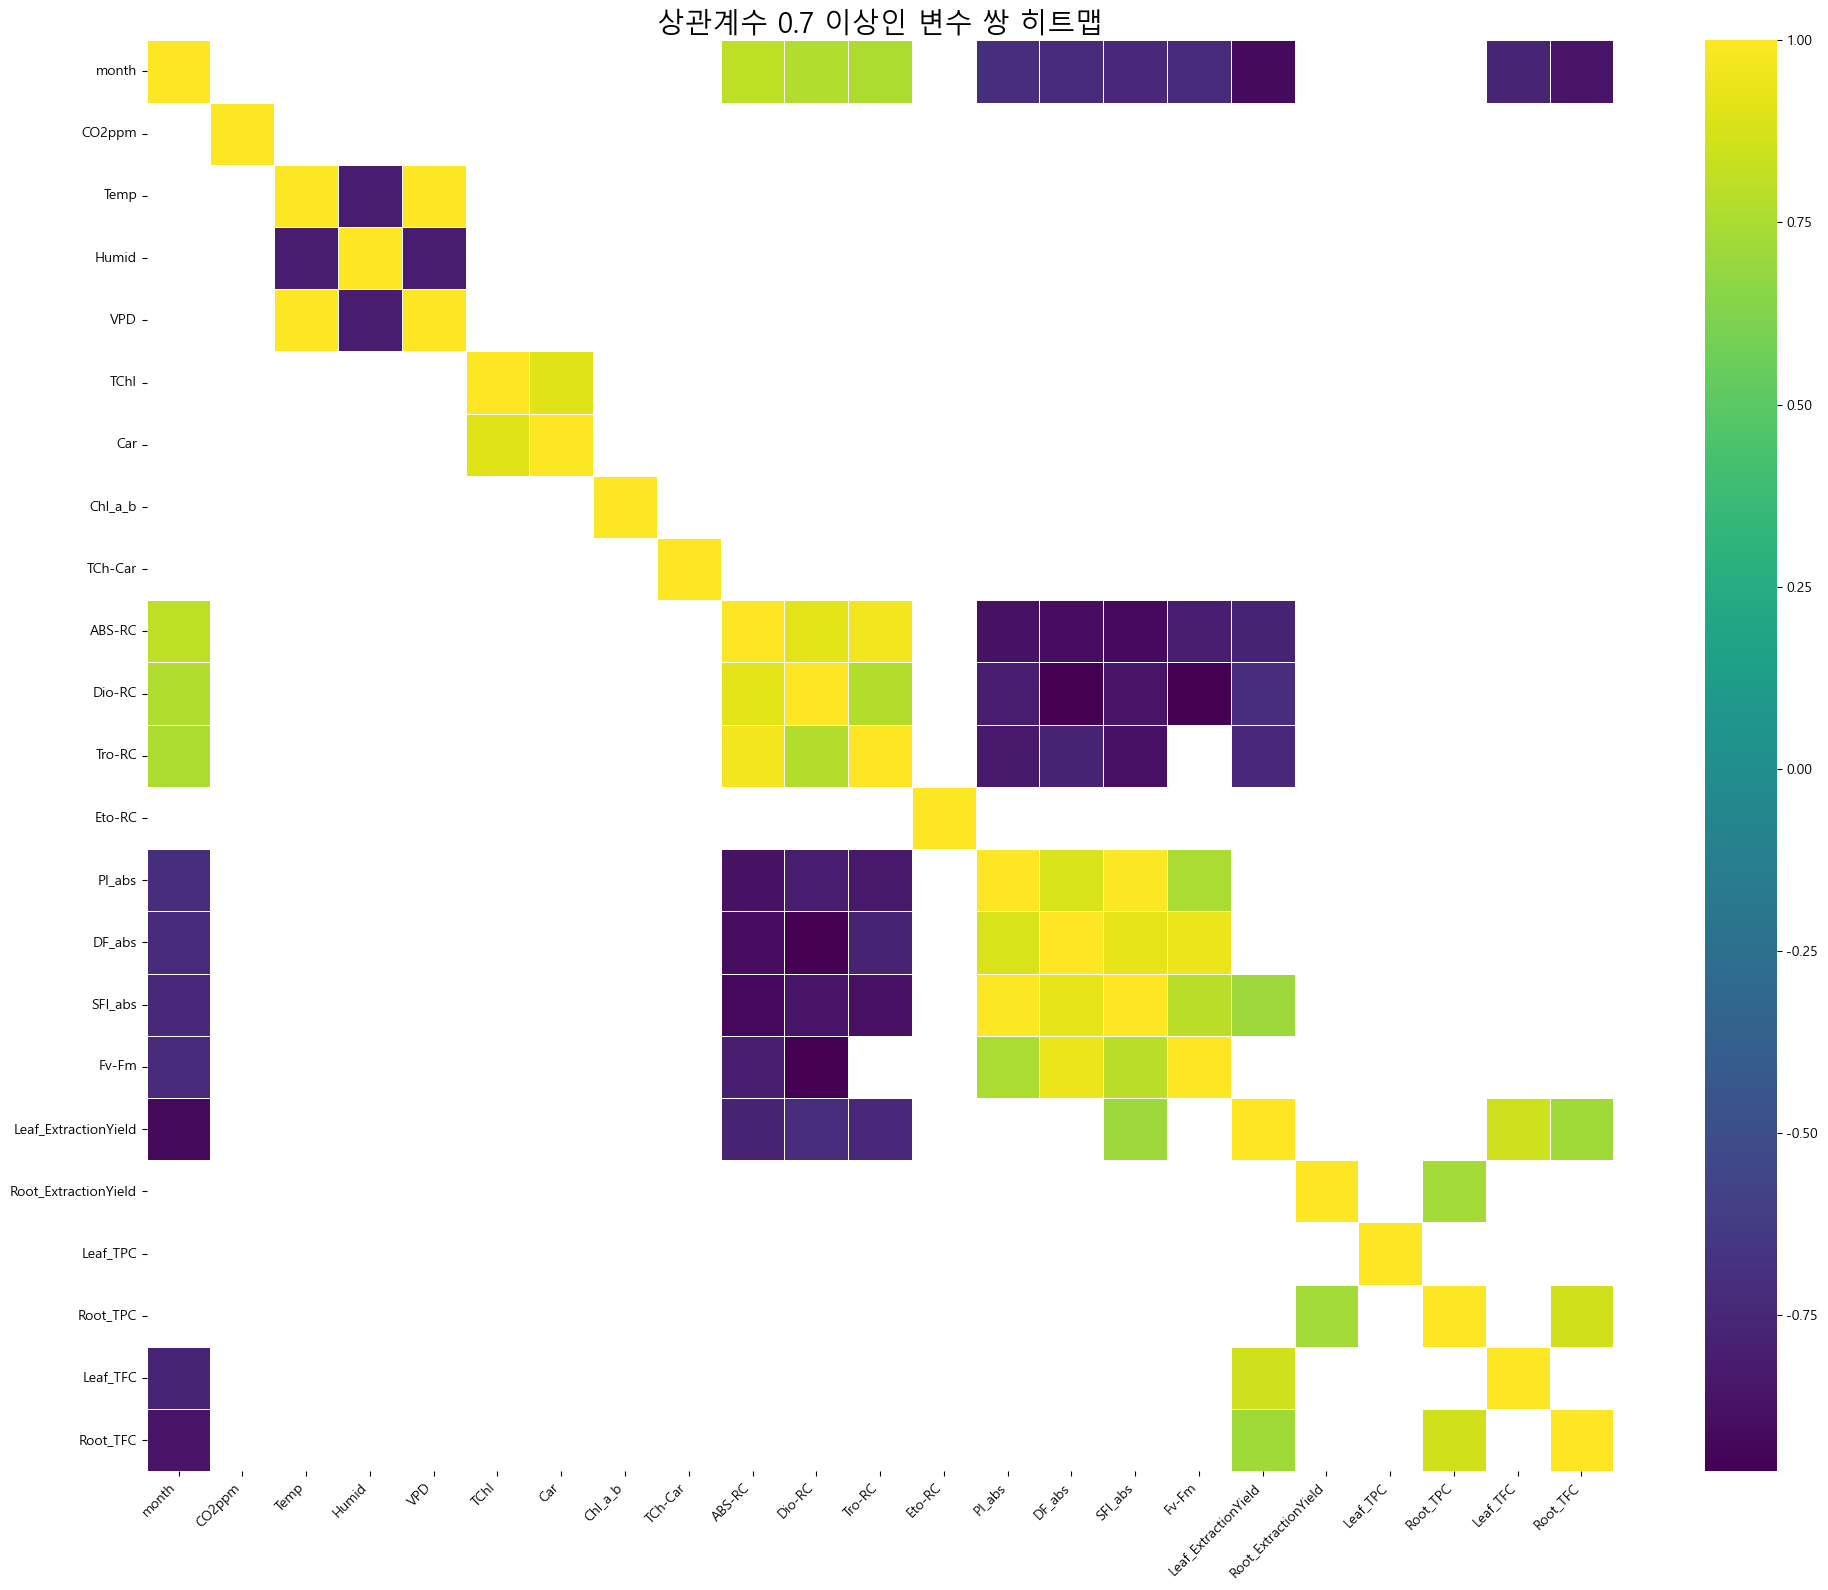

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. (핵심) 오류 해결: 숫자형 데이터만 선택하여 새로운 데이터프레임 생성
numeric_df = df_processed.select_dtypes(include=np.number)

# 3. 숫자형 데이터로 상관관계 행렬 계산
corr_matrix = numeric_df.corr()

# 4. 히트맵 시각화
# 히트맵을 그릴 figure의 사이즈 설정
plt.figure(figsize=(20, 16))

# 상관계수의 절댓값이 0.7 미만인 값들은 그래프에 표시하지 않도록 '마스크(mask)' 생성
mask = np.abs(corr_matrix) < 0.7

# seaborn의 heatmap 함수를 사용하여 시각화
sns.heatmap(corr_matrix, 
            annot=False,      # 셀 안에 상관계수 값을 표시하지 않음
            cmap='viridis',   # 색상 팔레트 지정
            mask=mask,        # 위에서 생성한 마스크 적용
            linewidths=.5)    # 각 셀을 구분하는 라인 추가

# 그래프 제목 및 축 레이블 설정
plt.title('상관계수 0.7 이상인 변수 쌍 히트맵', fontsize=20)
plt.xticks(rotation=45, ha='right') # x축 라벨이 겹치지 않도록 회전
plt.yticks(rotation=0)
plt.tight_layout() # 그래프 요소들이 겹치지 않도록 자동 조정

# (선택 사항) 화면에 그래프 표시
plt.show()

In [14]:
# 이상치 탐지 (IQR 방법)
def detect_outliers_iqr(df, column):
    """IQR 방법으로 이상치 탐지"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("="*60)
print("이상치 탐지 결과 (IQR 방법)")
print("="*60)

outlier_summary = []
for col in df_processed.columns:
    if col == 'month':
        continue
    
    outliers, lower, upper = detect_outliers_iqr(df_processed, col)
    outlier_count = len(outliers)
    
    if outlier_count > 0:
        outlier_percentage = (outlier_count / len(df_processed)) * 100
        outlier_summary.append({
            'Variable': col,
            'Outlier_Count': outlier_count,
            'Percentage': outlier_percentage,
            'Lower_Bound': lower,
            'Upper_Bound': upper
        })
        print(f"{col:25} : {outlier_count:4}개 ({outlier_percentage:5.1f}%) | 정상범위: [{lower:8.2f}, {upper:8.2f}]")

print(f"\n이상치가 있는 변수: {len(outlier_summary)}개")

이상치 탐지 결과 (IQR 방법)
Temp                      :   15개 (  3.7%) | 정상범위: [   18.70,    31.04]
Humid                     :   45개 ( 11.1%) | 정상범위: [   55.59,    73.72]
VPD                       :   14개 (  3.5%) | 정상범위: [    1.62,     3.22]
TChl                      :    9개 (  2.2%) | 정상범위: [    1.33,    12.57]
Car                       :    3개 (  0.7%) | 정상범위: [    0.44,     3.56]
Chl_a_b                   :   18개 (  4.4%) | 정상범위: [    2.05,     5.52]
TCh-Car                   :   12개 (  3.0%) | 정상범위: [    2.12,     4.84]
Dio-RC                    :   38개 (  9.4%) | 정상범위: [   -0.01,     0.84]
Tro-RC                    :   13개 (  3.2%) | 정상범위: [    0.68,     2.66]
Eto-RC                    :   12개 (  3.0%) | 정상범위: [    0.25,     1.00]
PI_abs                    :   30개 (  7.4%) | 정상범위: [   -0.50,     3.38]
DF_abs                    :   56개 ( 13.8%) | 정상범위: [   -0.48,     0.74]
SFI_abs                   :   15개 (  3.7%) | 정상범위: [    0.01,     0.31]
Fv-Fm                     :   67개 ( 16.5%) | 

TypeError: unsupported operand type(s) for -: 'str' and 'str'